In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Standard imports

In [2]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import sys
import os

from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sys

# Run this if you are using google colab
sys.path.append('/content/drive/My Drive/')

from src.utils import *
from src.visualisation import *

Using TensorFlow backend.


In [0]:
!unzip -q 'drive/My Drive/cell-images-for-detecting-malaria.zip'

In [0]:
path = 'cell_images/cell_images/'

In [5]:
# Get the first 50 samples in training path : 'NORMAL' & 'PNEUMONIA'
samples_normal, samples_malaria, _, _ = get_data(path,50)

Files in first 50 images of cell_images/cell_images/Uninfected appended!
Files in first 50 images of cell_images/cell_images/Parasitized appended!


## Visualise a few images

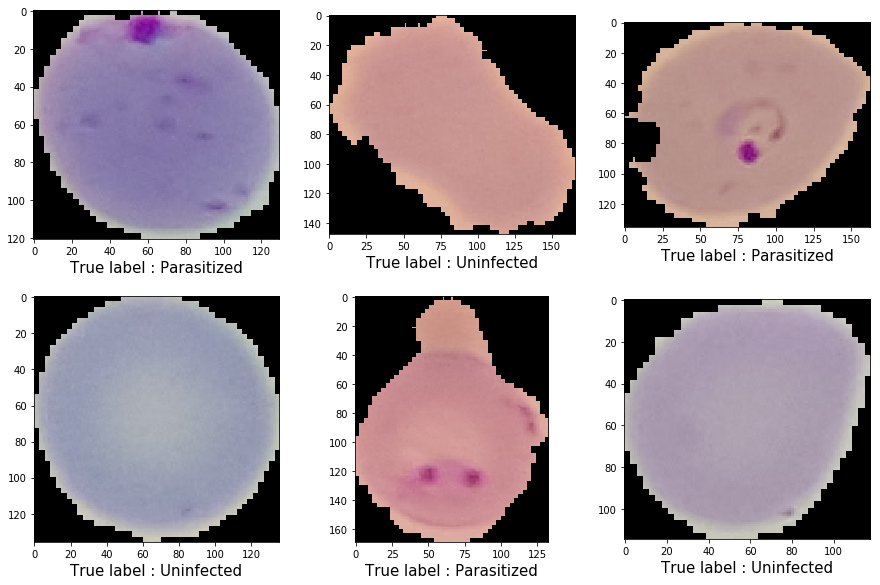

In [9]:
visualise_images(samples_normal,samples_malaria)

- The intuition here is that parasitized cells are those with large purple blobs, wheras the uninfected cells are those that are clear without any obvious deep purple blobs.

## Analyzing value counts

In [0]:
uninfected_path = os.listdir(path + 'Uninfected')
parasitized_path = os.listdir(path + 'Parasitized')

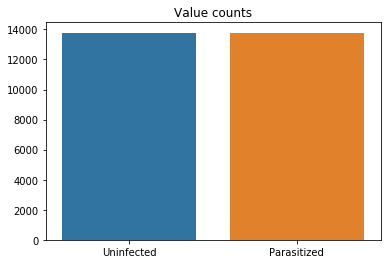

In [11]:
# Get the countplots
sns.barplot(x=['Uninfected','Parasitized'],y=[len(uninfected_path),len(parasitized_path)])
plt.title('Value counts')
plt.show()

- Classes are quite balanced

## Initial generation of train , test, val dataframes (Only run this once!)

In [0]:
from sklearn.model_selection import train_test_split

def create_train_test_val(path,test_size1=0.3,test_size2=0.25):
  
  train, val = train_test_split(path,test_size=test_size1)
  val, test = train_test_split(val,test_size=test_size2)
  print('Train, test and val set created !')
  return train, val, test

In [13]:
train_uninfected, val_uninfected, test_uninfected = create_train_test_val(uninfected_path)

Train, test and val set created !


In [14]:
train_parasitized, val_parasitized, test_parasitized = create_train_test_val(parasitized_path)

Train, test and val set created !


In [0]:
train_combined = train_uninfected + train_parasitized
test_combined = test_uninfected + test_parasitized
val_combined = val_uninfected + val_parasitized

In [0]:
pd.DataFrame({'train_combined':train_combined}).to_csv('malaria_train_combined.csv')
pd.DataFrame({'test_combined':test_combined}).to_csv('malaria_test_combined.csv')
pd.DataFrame({'val_combined':val_combined}).to_csv('malaria_val_combined.csv')

- From now on, we will use the same set for training, testing and validation.
- The csvs contain the filenames required for the data generators